# Preprocessing data notebook
## Setup

In [1]:
#Packages
library("phyloseq")
library("microbiome")
library("IRdisplay")
library("vegan")
#Load the phyloseq object
load("phyloseq.RData")

Loading required package: ggplot2


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required package: permute

Loading required package: lattice

This is vegan 2.6-6.1


Attaching package: ‘vegan’


The following object is masked from ‘package:microbiome’:

    diversity




## Summarise the phyloseq object

In [2]:
#Summary of phyloseq object
microbiome::summarize_phyloseq(pseq)

Compositional = NO2

1] Min. number of reads = 104332] Max. number of reads = 170053] Total number of reads = 4948314] Average number of reads = 13745.30555555565] Median number of reads = 14050.57] Sparsity = 0.9389890674680956] Any OTU sum to 1 or less? NO8] Number of singletons = 09] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)010] Number of sample variables are: 5sample.namesitemediareplicatesite.media2



[[1]]
[1] "1] Min. number of reads = 10433"

[[2]]
[1] "2] Max. number of reads = 17005"

[[3]]
[1] "3] Total number of reads = 494831"

[[4]]
[1] "4] Average number of reads = 13745.3055555556"

[[5]]
[1] "5] Median number of reads = 14050.5"

[[6]]
[1] "7] Sparsity = 0.938989067468095"

[[7]]
[1] "6] Any OTU sum to 1 or less? NO"

[[8]]
[1] "8] Number of singletons = 0"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0"

[[10]]
[1] "10] Number of sample variables are: 5"

[[11]]
[1] "sample.name" "site"        "media"       "replicate"   "site.media"

LD_CVP_rep1 LD_CVP_rep2 LD_CVP_rep3 LD_ENV_rep1 LD_ENV_rep2 LD_ENV_rep3 
      10433       13940       13234       12700       15571       16435 
LD_KBC_rep1 LD_KBC_rep2 LD_KBC_rep3 LD_TSA_rep1 LD_TSA_rep2 LD_TSA_rep3 
      15401       15038       16058       17005       15273       15655 
MD_CVP_rep1 MD_CVP_rep2 MD_CVP_rep3 MD_ENV_rep1 MD_ENV_rep2 MD_ENV_rep3 
      12862       13446       14540       16900       16471       15764 
MD_KBC_rep1 MD_KBC_rep2 MD_KBC_rep3 MD_TSA_rep1 MD_TSA_rep2 MD_TSA_rep3 
      11102       10915       12373       12366       14161       10521 
UD_CVP_rep1 UD_CVP_rep2 UD_CVP_rep3 UD_ENV_rep1 UD_ENV_rep2 UD_ENV_rep3 
      10638       12189       12643       11046       11381       11124 
UD_KBC_rep1 UD_KBC_rep2 UD_KBC_rep3 UD_TSA_rep1 UD_TSA_rep2 UD_TSA_rep3 
      14439       15863       15325       13394       14305       14320

png 
  2

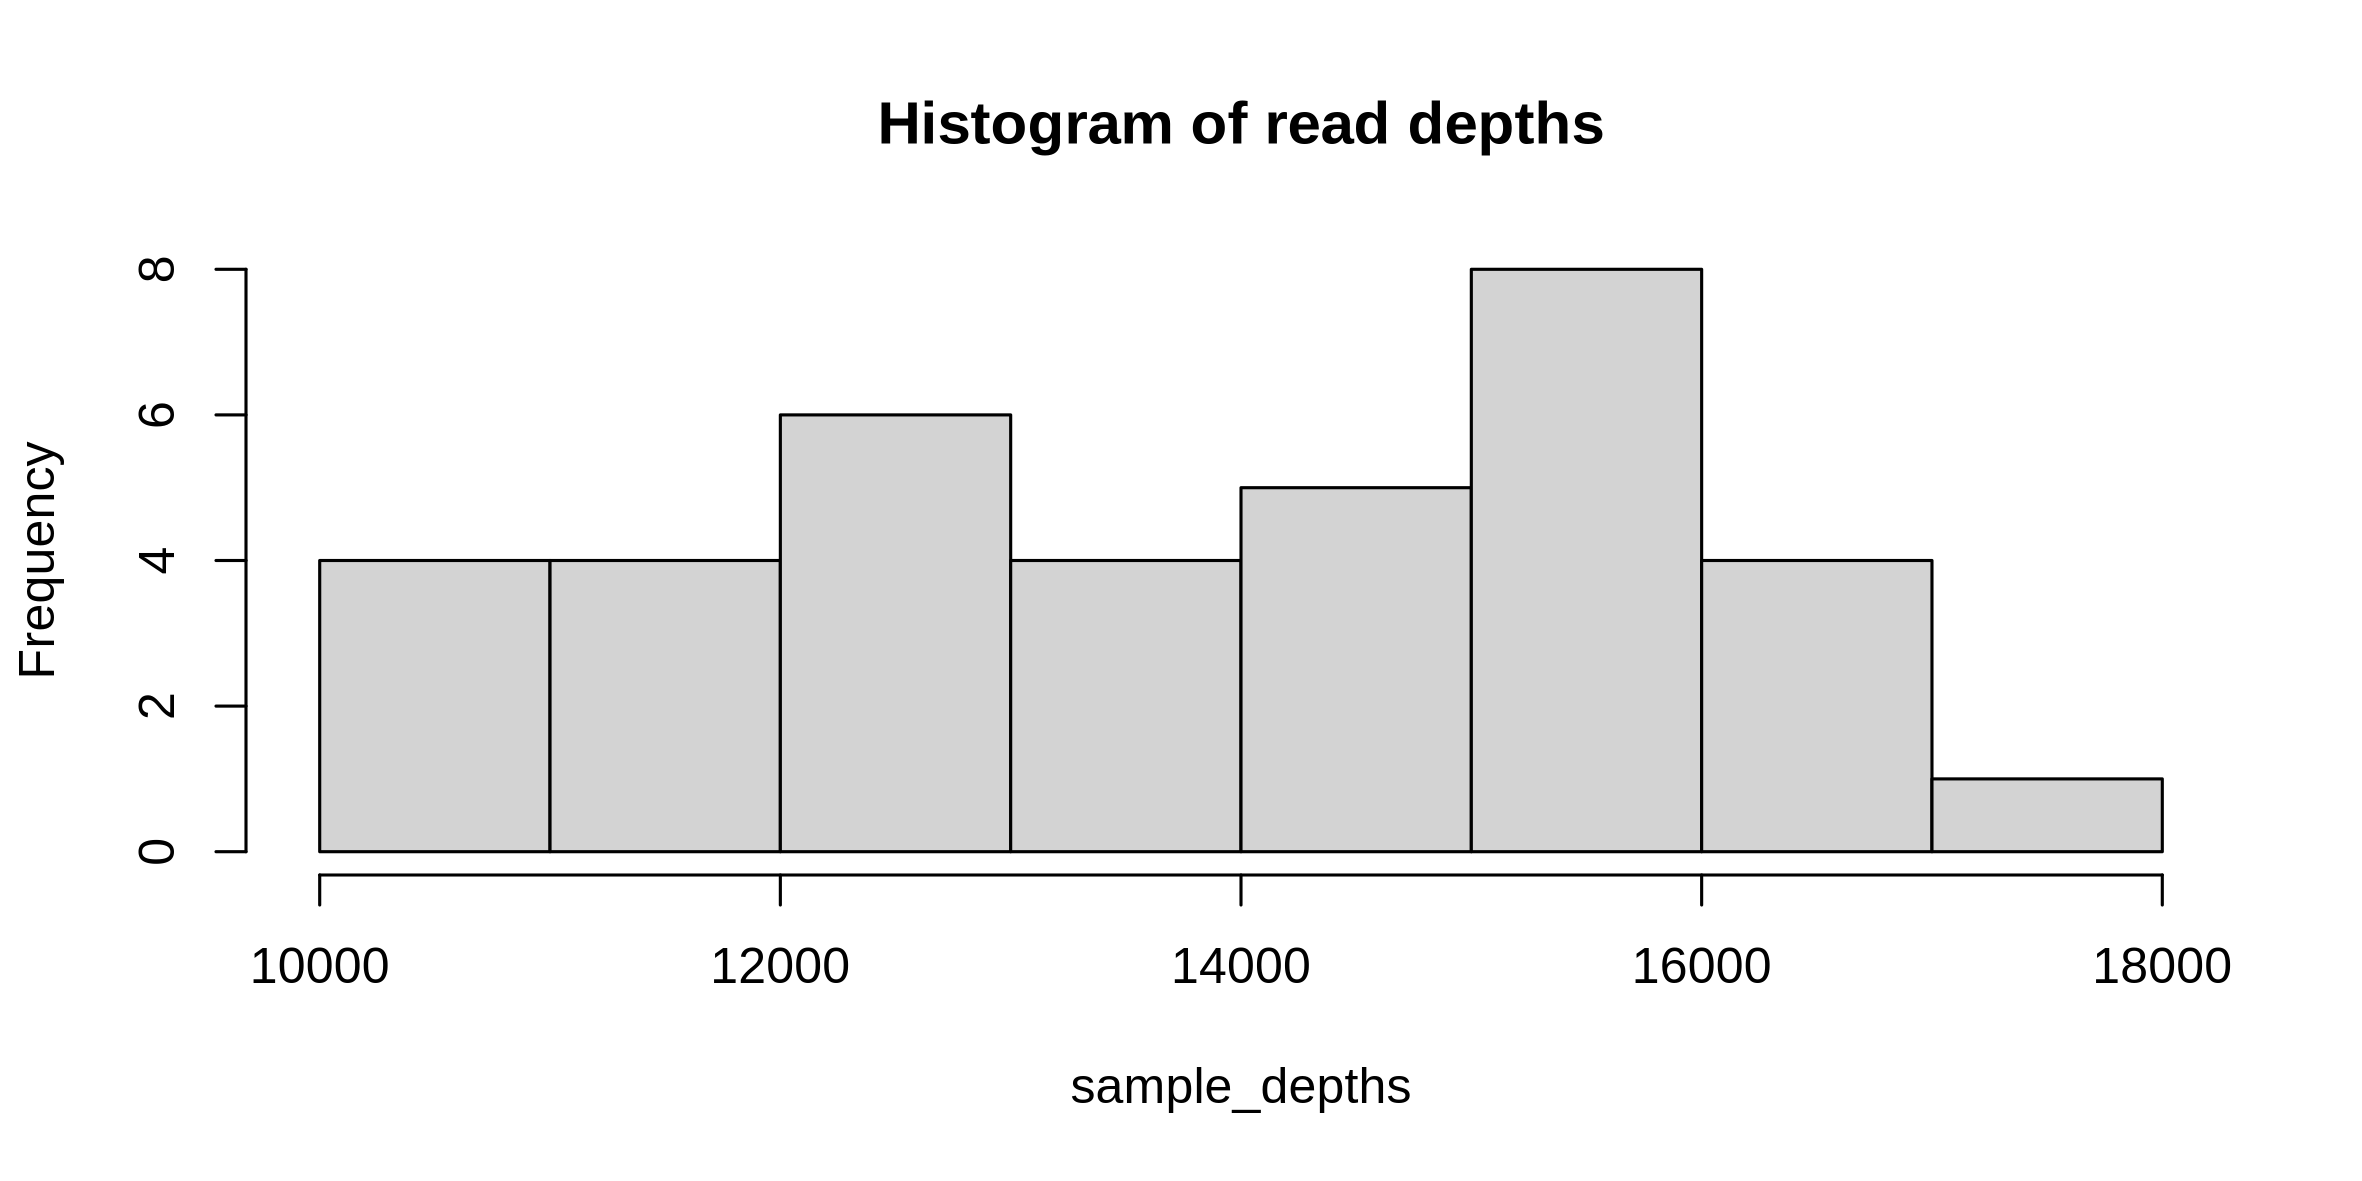

In [3]:
#Number of reads per sample
sample_depths  <- microbiome::readcount(pseq)
sample_depths
#Histogram
#Save as png
png(filename = "sample_depth_histogram.png", res = 300,
   units = "mm", height = 100, width = 200)
hist(sample_depths, main = "Histogram of read depths")
dev.off()
#Display the plot in jupyter notebook
IRdisplay::display_png(file = "./sample_depth_histogram.png")

In [4]:
#Can extract ASV table (known as otu table in phyloseq)
head(phyloseq::otu_table(pseq))

,LD_CVP_rep1,LD_CVP_rep2,LD_CVP_rep3,LD_ENV_rep1,LD_ENV_rep2,LD_ENV_rep3,LD_KBC_rep1,LD_KBC_rep2,LD_KBC_rep3,LD_TSA_rep1,⋯,UD_CVP_rep3,UD_ENV_rep1,UD_ENV_rep2,UD_ENV_rep3,UD_KBC_rep1,UD_KBC_rep2,UD_KBC_rep3,UD_TSA_rep1,UD_TSA_rep2,UD_TSA_rep3
7aa9cce284b4825a1355b6b5d0bd9211,0,0,0,0,0,0,0,0,0,0,⋯,0,0,2,0,0,0,0,0,0,0
2fe1b9bec1ba6c2f13ee3063c4ba3fd4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7ff0f5e482d6392255caadc90143ab64,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4d7e10eba1c9d7a61f23312f4db1917e,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3eccdc8aead0911224e022a730a85154,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
68a9eac912441a59e5bfb5fe80f2e840,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [5]:
#Each row is an ASV and each column is a sample
#Therefore we can get the number of ASVs in the data by counting the number of rows
#Let's make a new vector with this info so we can easily keep track
num_asvs_vec <- c(nrow(phyloseq::otu_table(pseq)))
#Give the 1st element a relevant name
names(num_asvs_vec)[1] <- "abundance"
#View current vector
num_asvs_vec

abundance 
     2551

In [6]:
#Save object as file
save(num_asvs_vec, file = "num_asvs_vec.RData")
#Remove object from environment
rm(num_asvs_vec)

## Minimum read depth

In [7]:
#Extract sample data as a separate R object
abundance_metadf <- phyloseq::sample_data(pseq)
#View top 6 rows of metadata data frame
head(abundance_metadf)
#Check if our vector of sample_depths has the same order as our metadata rows
head(names(sample_depths))
head(row.names(abundance_metadf))
identical(names(sample_depths), row.names(abundance_metadf))
#Add sample depths to metadata data frame
abundance_metadf[,"depth"]  <- sample_depths
#View top 6 rows of editied metadata dataframe
head(abundance_metadf)

,sample.name,site,media,replicate,site.media
,<fct>,<fct>,<fct>,<fct>,<fct>
LD_CVP_rep1,LD_CVP_rep1,LD,CVP,rep1,LD_CVP
LD_CVP_rep2,LD_CVP_rep2,LD,CVP,rep2,LD_CVP
LD_CVP_rep3,LD_CVP_rep3,LD,CVP,rep3,LD_CVP
LD_ENV_rep1,LD_ENV_rep1,LD,ENV,rep1,LD_ENV
LD_ENV_rep2,LD_ENV_rep2,LD,ENV,rep2,LD_ENV
LD_ENV_rep3,LD_ENV_rep3,LD,ENV,rep3,LD_ENV


[1] "LD_CVP_rep1" "LD_CVP_rep2" "LD_CVP_rep3" "LD_ENV_rep1" "LD_ENV_rep2"
[6] "LD_ENV_rep3"

[1] "LD_CVP_rep1" "LD_CVP_rep2" "LD_CVP_rep3" "LD_ENV_rep1" "LD_ENV_rep2"
[6] "LD_ENV_rep3"

[1] TRUE

,sample.name,site,media,replicate,site.media,depth
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
LD_CVP_rep1,LD_CVP_rep1,LD,CVP,rep1,LD_CVP,10433
LD_CVP_rep2,LD_CVP_rep2,LD,CVP,rep2,LD_CVP,13940
LD_CVP_rep3,LD_CVP_rep3,LD,CVP,rep3,LD_CVP,13234
LD_ENV_rep1,LD_ENV_rep1,LD,ENV,rep1,LD_ENV,12700
LD_ENV_rep2,LD_ENV_rep2,LD,ENV,rep2,LD_ENV,15571
LD_ENV_rep3,LD_ENV_rep3,LD,ENV,rep3,LD_ENV,16435


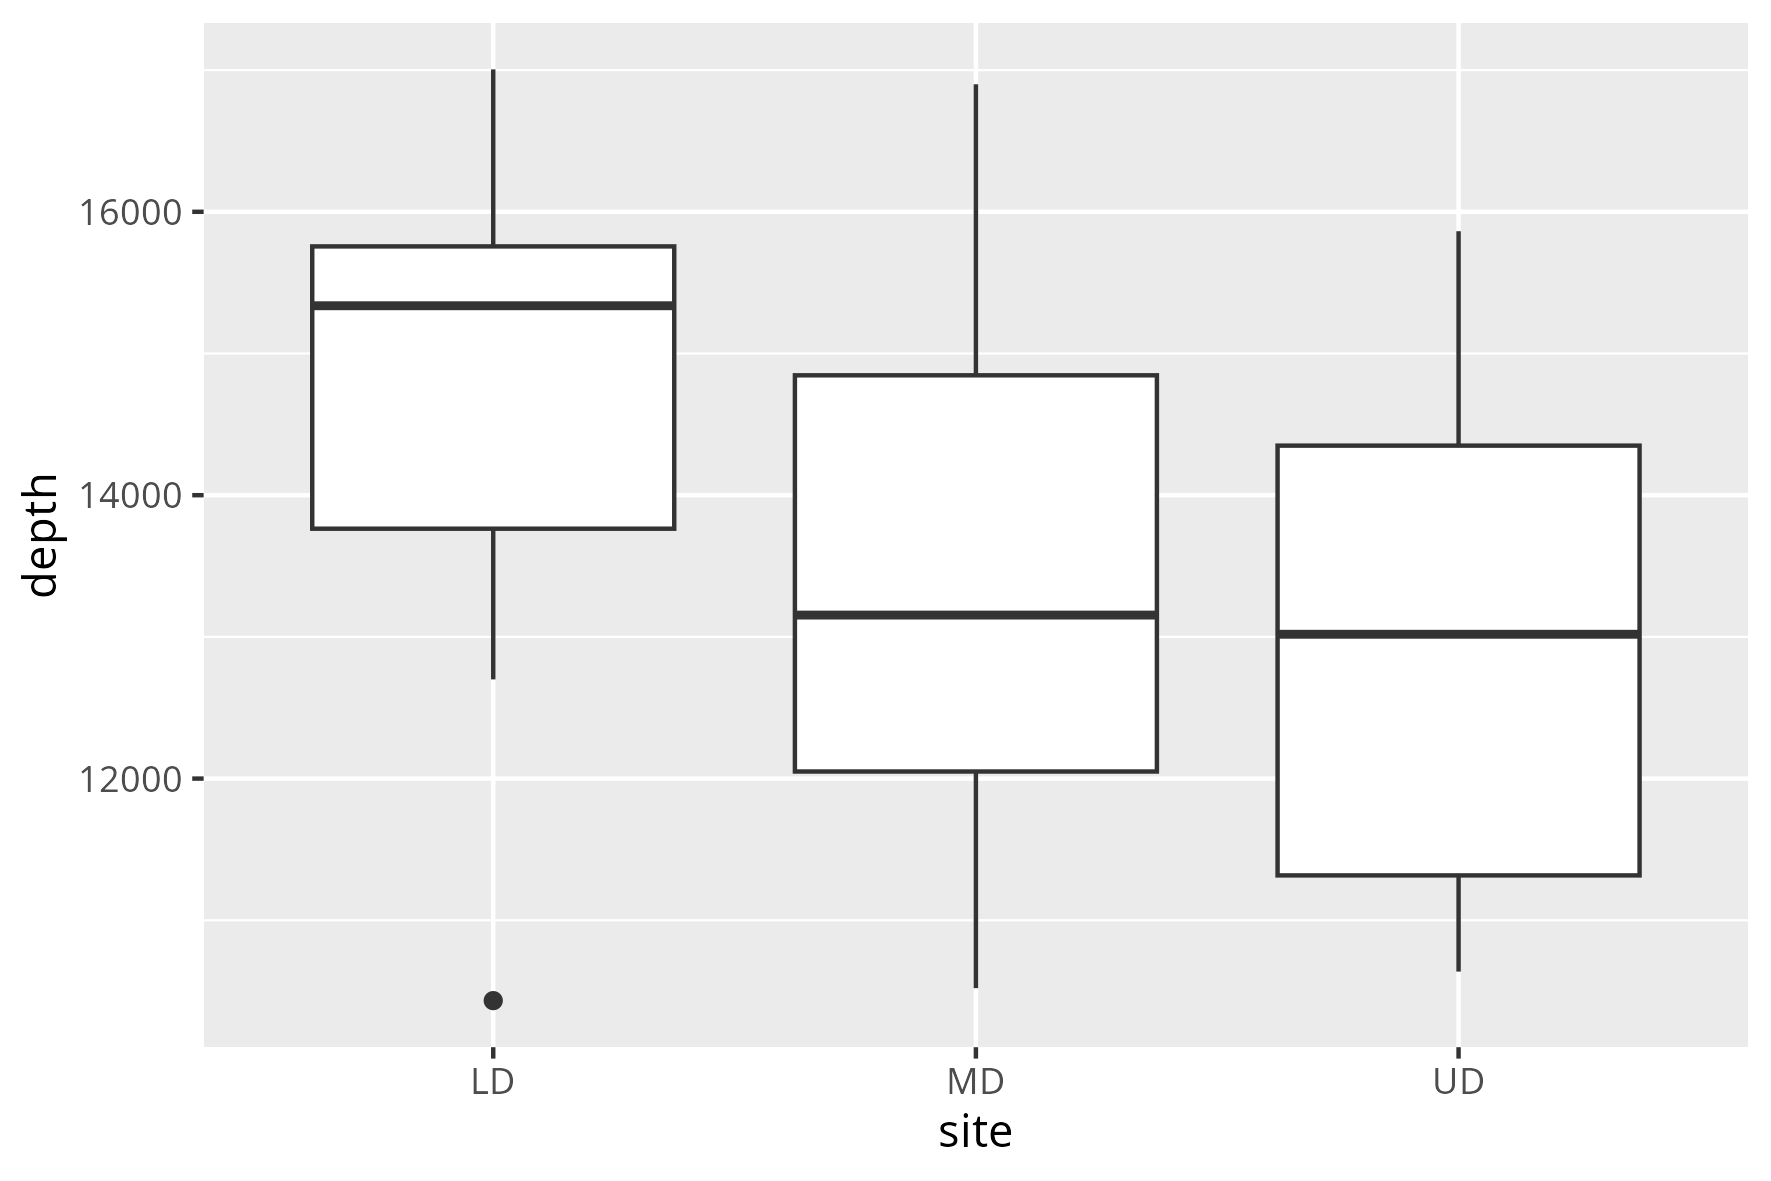

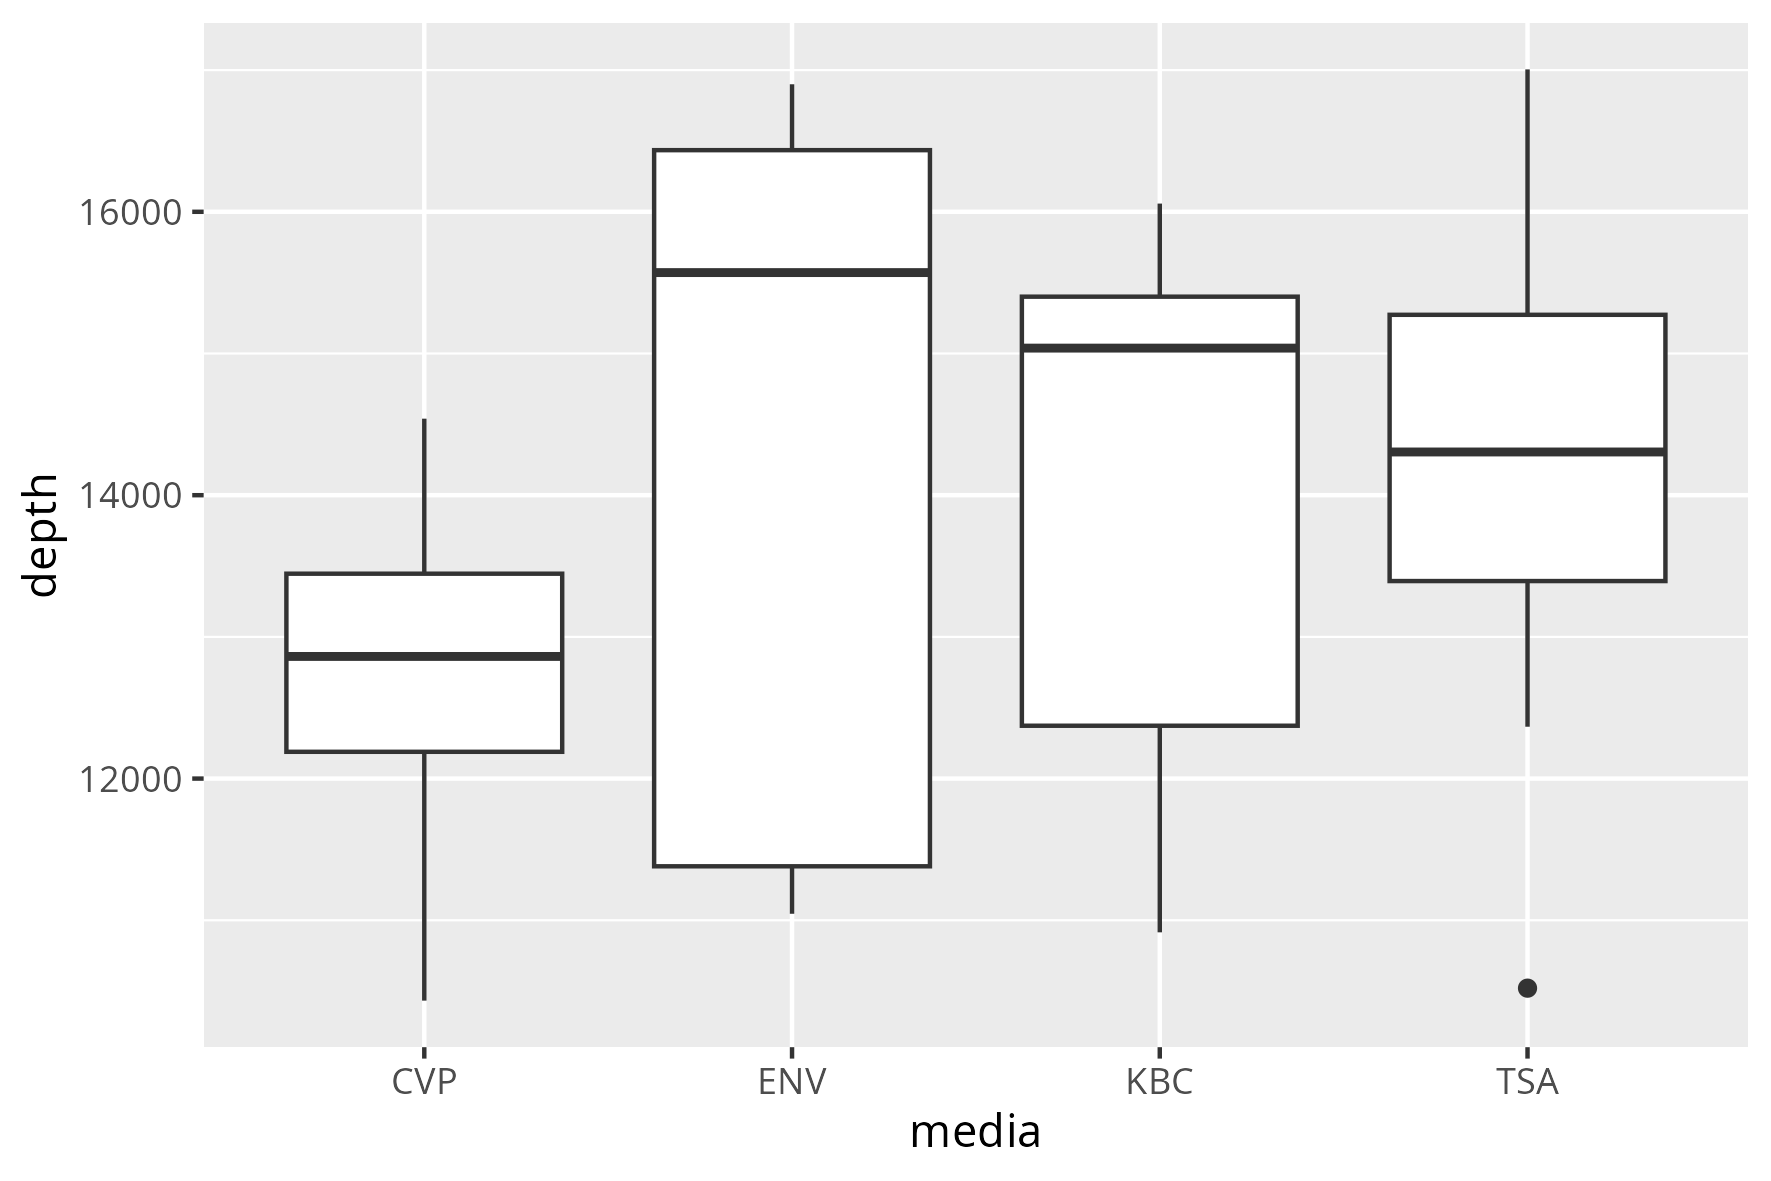

In [8]:
#Create ggplot2 boxplot of depth by site
boxplot <- ggplot2::ggplot(abundance_metadf, aes(y=depth, x=site)) +
    ggplot2::geom_boxplot()
#Save ggplot object as png file
ggsave(filename = "./boxplot_x_site_y_depth.png", plot = boxplot, 
       device = "png", dpi = 300, units = "mm", height = 100, width = 150)
#Display the plot in jupyter notebook
IRdisplay::display_png(file="./boxplot_x_site_y_depth.png")
#Create ggplot2 boxplot of depth by media
boxplot <- ggplot2::ggplot(abundance_metadf, aes(y=depth, x=media)) +
    ggplot2::geom_boxplot()
#Save as png
ggsave(filename = "./boxplot_x_media_y_depth.png", plot = boxplot, 
       device = "png", dpi = 300, units = "mm", height = 100, width = 150)
#Display the plot in jupyter notebook
IRdisplay::display_png(file="./boxplot_x_media_y_depth.png")

Warning message in vegan::rarecurve(x = asv_abund_df, step = 50, xlab = "Read depth", :
“most observed count data have counts 1, but smallest count is 2”


png 
  2

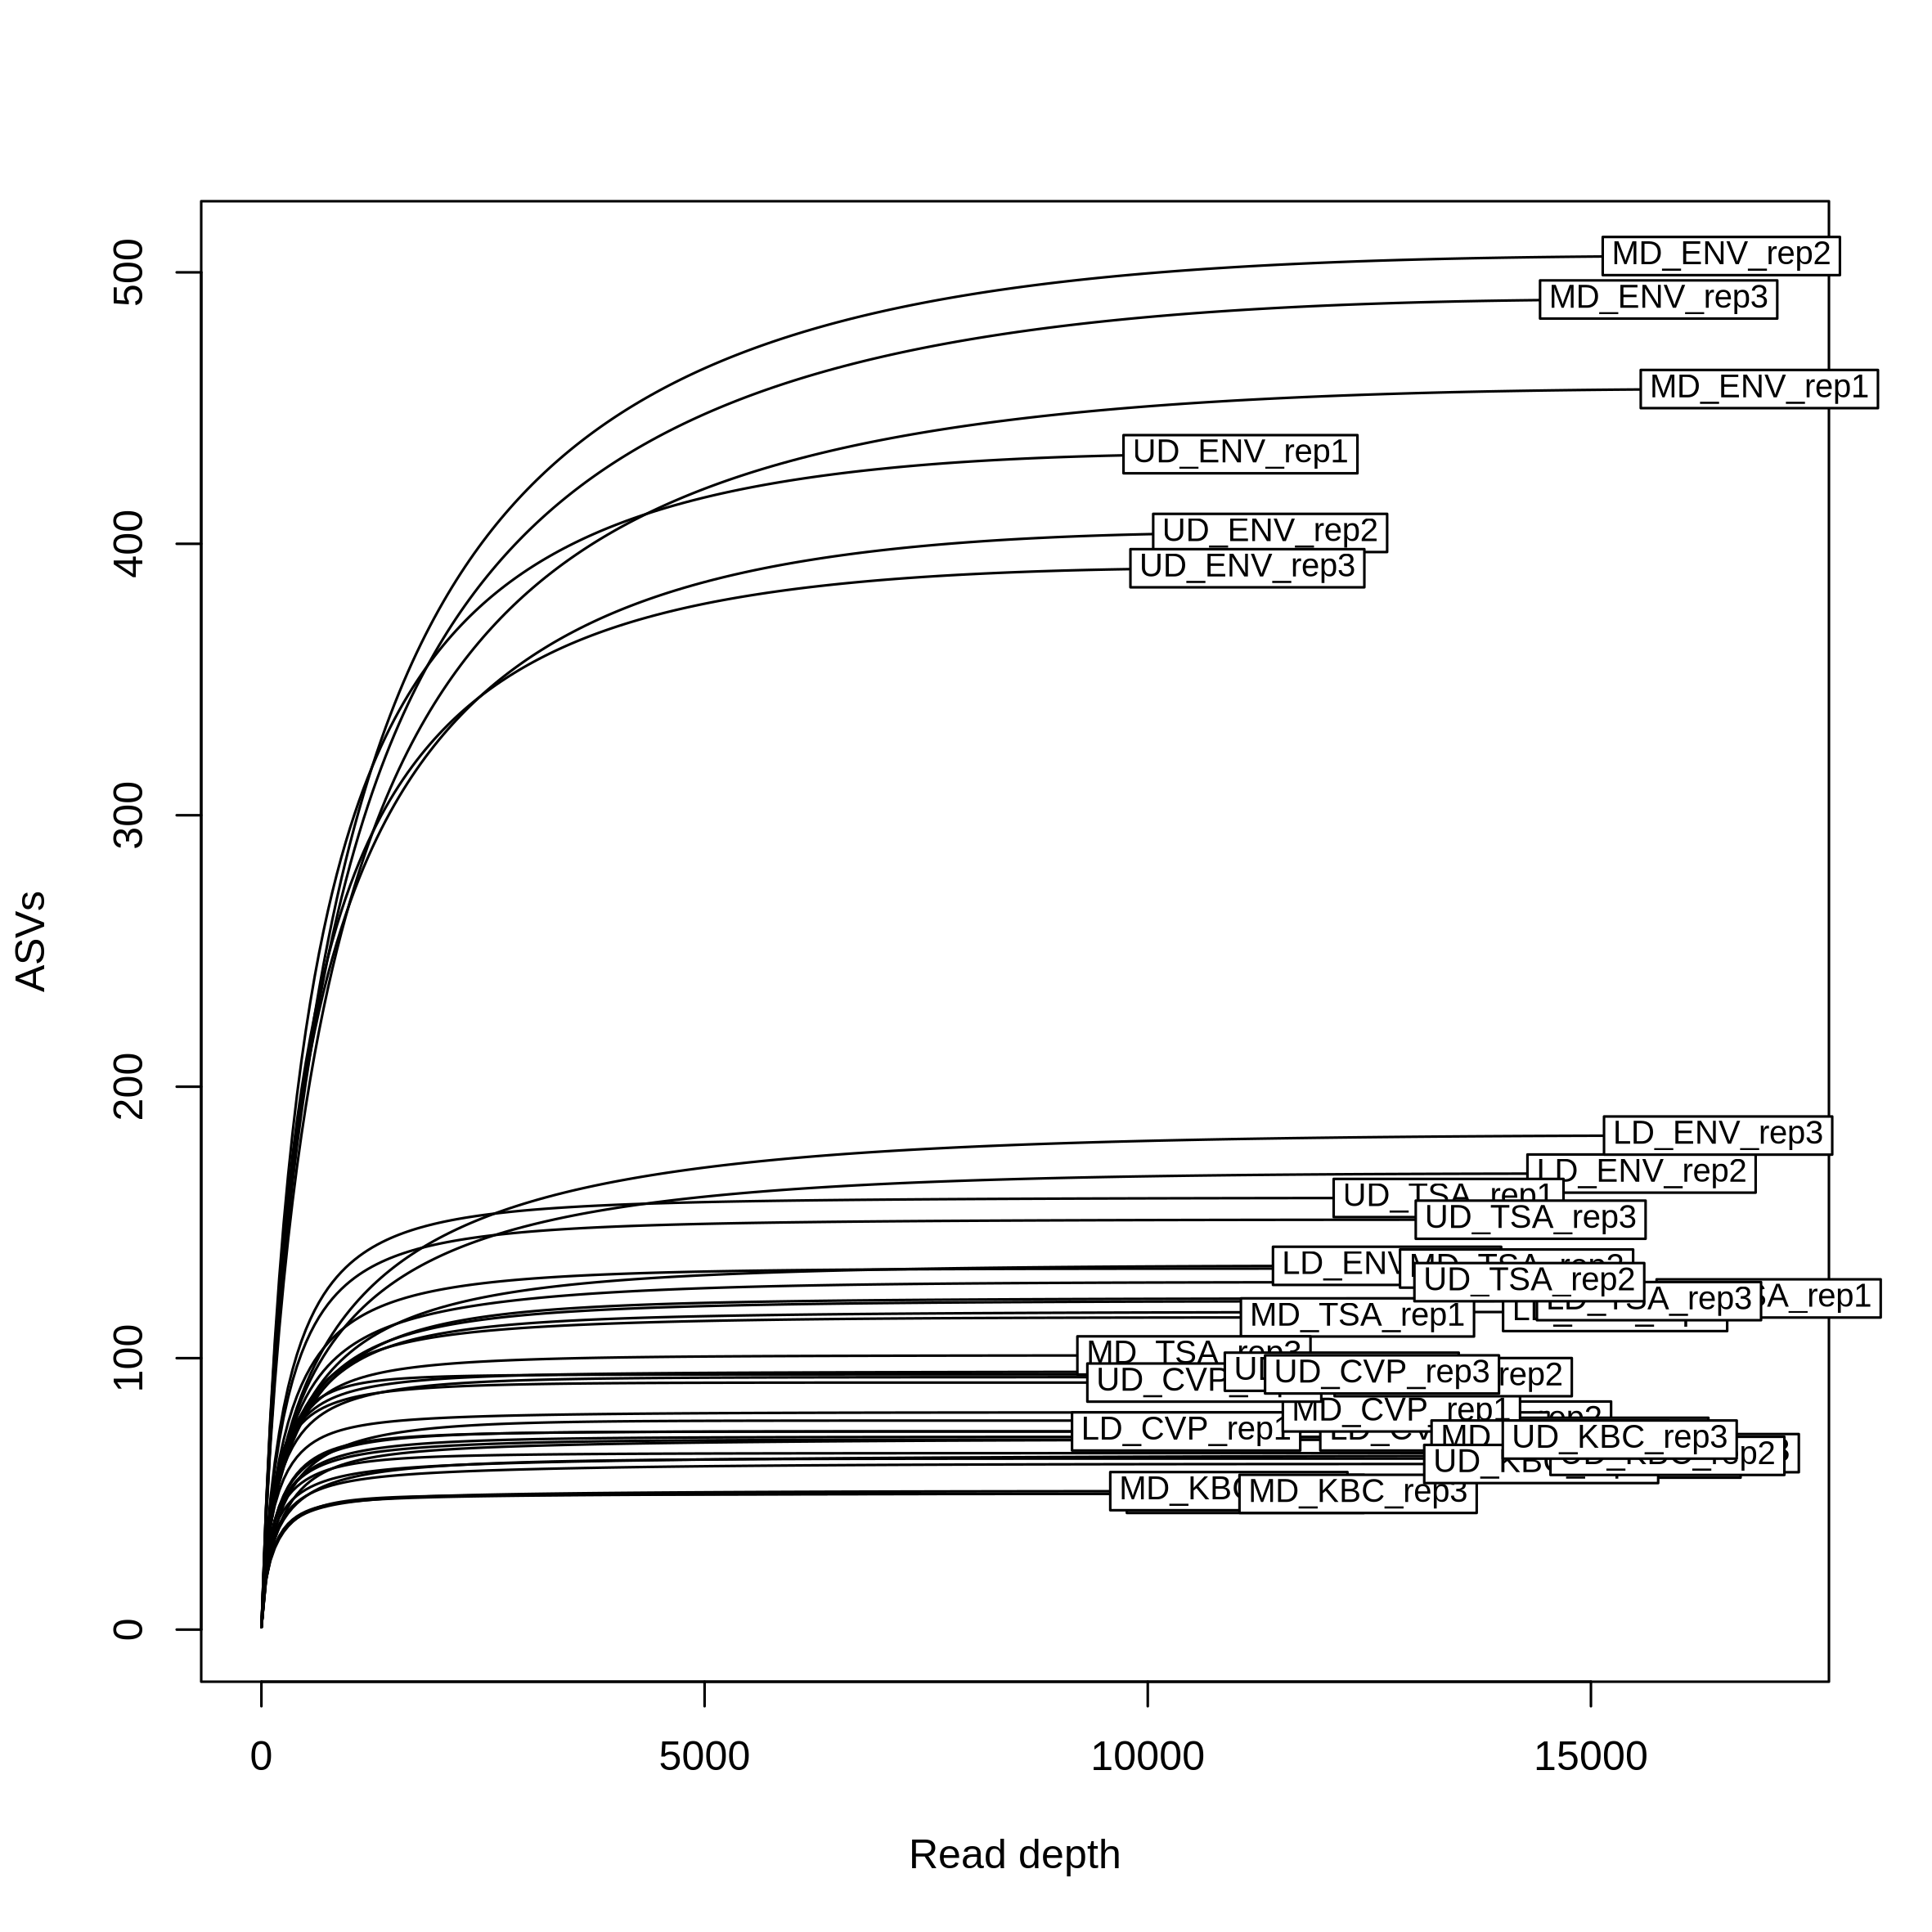

In [9]:
#Rarefaction curves
#Extract ASV table as transposed data frame
asv_abund_df <- as.data.frame(t(phyloseq::otu_table(pseq)))
#Save as png
png(filename = "rarefaction.png", res = 300,
   units = "mm", height = 200, width = 200)
#plot
vegan::rarecurve(
    x = asv_abund_df, step = 50,
    xlab = "Read depth",
    ylab = "ASVs"
)
dev.off()
#Display the plot in jupyter notebook
IRdisplay::display_png(file = "./rarefaction.png")

In [10]:
#Subset and keep samples with at leat 11k reads
pseq_min11k  <- phyloseq::subset_samples(pseq, sample_depths > 11000)
#Abundance sums of the 1st six ASVs
head(phyloseq::taxa_sums(pseq_min11k))
#View number of ASVs in our data
length(phyloseq::taxa_sums(pseq_min11k))
#Remove ASVs with no abundance
pseq_min11k  <- phyloseq::prune_taxa(
    phyloseq::taxa_sums(pseq_min11k) > 0, pseq_min11k
                          )
#Summarise subsetted phyloseq
microbiome::summarize_phyloseq(pseq_min11k)
microbiome::readcount(pseq_min11k)
length(phyloseq::taxa_sums(pseq_min11k))
pseq_min11k

7aa9cce284b4825a1355b6b5d0bd9211 2fe1b9bec1ba6c2f13ee3063c4ba3fd4 
                               2                                7 
7ff0f5e482d6392255caadc90143ab64 4d7e10eba1c9d7a61f23312f4db1917e 
                              21                                7 
3eccdc8aead0911224e022a730a85154 68a9eac912441a59e5bfb5fe80f2e840 
                              17                               15

[1] 2551

Compositional = NO2

1] Min. number of reads = 110462] Max. number of reads = 170053] Total number of reads = 4523244] Average number of reads = 14135.1255] Median number of reads = 14312.57] Sparsity = 0.9345668316831686] Any OTU sum to 1 or less? NO8] Number of singletons = 09] Percent of OTUs that are singletons 
        (i.e. exactly one read detected across all samples)010] Number of sample variables are: 5sample.namesitemediareplicatesite.media2



[[1]]
[1] "1] Min. number of reads = 11046"

[[2]]
[1] "2] Max. number of reads = 17005"

[[3]]
[1] "3] Total number of reads = 452324"

[[4]]
[1] "4] Average number of reads = 14135.125"

[[5]]
[1] "5] Median number of reads = 14312.5"

[[6]]
[1] "7] Sparsity = 0.934566831683168"

[[7]]
[1] "6] Any OTU sum to 1 or less? NO"

[[8]]
[1] "8] Number of singletons = 0"

[[9]]
[1] "9] Percent of OTUs that are singletons \n        (i.e. exactly one read detected across all samples)0"

[[10]]
[1] "10] Number of sample variables are: 5"

[[11]]
[1] "sample.name" "site"        "media"       "replicate"   "site.media"

LD_CVP_rep2 LD_CVP_rep3 LD_ENV_rep1 LD_ENV_rep2 LD_ENV_rep3 LD_KBC_rep1 
      13940       13234       12700       15571       16435       15401 
LD_KBC_rep2 LD_KBC_rep3 LD_TSA_rep1 LD_TSA_rep2 LD_TSA_rep3 MD_CVP_rep1 
      15038       16058       17005       15273       15655       12862 
MD_CVP_rep2 MD_CVP_rep3 MD_ENV_rep1 MD_ENV_rep2 MD_ENV_rep3 MD_KBC_rep1 
      13446       14540       16900       16471       15764       11102 
MD_KBC_rep3 MD_TSA_rep1 MD_TSA_rep2 UD_CVP_rep2 UD_CVP_rep3 UD_ENV_rep1 
      12373       12366       14161       12189       12643       11046 
UD_ENV_rep2 UD_ENV_rep3 UD_KBC_rep1 UD_KBC_rep2 UD_KBC_rep3 UD_TSA_rep1 
      11381       11124       14439       15863       15325       13394 
UD_TSA_rep2 UD_TSA_rep3 
      14305       14320

[1] 2525

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2525 taxa and 32 samples ]
sample_data() Sample Data:       [ 32 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2525 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2525 tips and 2515 internal nodes ]

In [11]:
#Difference of minimum read numbers
min(microbiome::readcount(pseq_min11k)) - min(microbiome::readcount(pseq))
#Number of samples lost
length(microbiome::readcount(pseq)) - length(microbiome::readcount(pseq_min11k))
#Number of reads removed
sum(microbiome::readcount(pseq)) - sum(microbiome::readcount(pseq_min11k))
#Bonus
#Samples removed
setdiff(phyloseq::sample_names(pseq),phyloseq::sample_names(pseq_min11k))

[1] 613

[1] 4

[1] 42507

[1] "LD_CVP_rep1" "MD_KBC_rep2" "MD_TSA_rep3" "UD_CVP_rep1"

In [12]:
#Remove subsetted phyloseq
rm(pseq_min11k)